In [2]:
import pandas as pd
import numpy as np

In [8]:
from python.listingspreprocessing import ListingsPreprocessing

In [28]:
listdf = ListingsPreprocessing('../data/2018_04_14/listings.csv').do_preprocessing()
folder = ['2018_05_17','2018_07_17','2018_08_16','2018_09_14','2018_10_11','2018_11_15','2018_12_13','2019_01_17','2019_02_09']
for f in folder:
    testdf = ListingsPreprocessing('../data/'+f+'/listings.csv').do_preprocessing()
    listdf = pd.concat([listdf,testdf],ignore_index=True,sort='False')

In [44]:
listdf.columns.values

array(['Adams', 'Alki', 'Arbor Heights', 'Atlantic', 'Belltown',
       'Bitter Lake', 'Briarcliff', 'Brighton', 'Broadview', 'Broadway',
       'Bryant', 'Cedar Park', 'Central Business District',
       'Columbia City', 'Crown Hill', 'Dunlap', 'East Queen Anne',
       'Eastlake', 'Fairmount Park', 'Fauntleroy', 'First Hill',
       'Fremont', 'Gatewood', 'Genesee', 'Georgetown', 'Green Lake',
       'Greenwood', 'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', 'Leschi',
       'Lower Queen Anne', 'Loyal Heights', 'Madison Park', 'Madrona',
       'Mann', 'Maple Leaf', 'Matthews Beach', 'Meadowbrook',
       'Mid-Beacon Hill', 'Minor', 'Montlake', 'Mount Baker',
       'North Admiral', 'North Beach/Blue Ridge', 'North Beacon Hill',
       'North College Park', 'North Delridge', 'North Queen Anne',
       'Olympic Hills', 'Phinney Ridge', 'Pike-M

In [35]:
listdf['price_log10'] = listdf['price'].apply(lambda x: np.log10(x))
listdf['maxnights_log2'] = listdf['maximum_nights'].apply(lambda x: np.log2(x))
listdf['minnights_log2'] = listdf['minimum_nights'].apply(lambda x: np.log2(x))

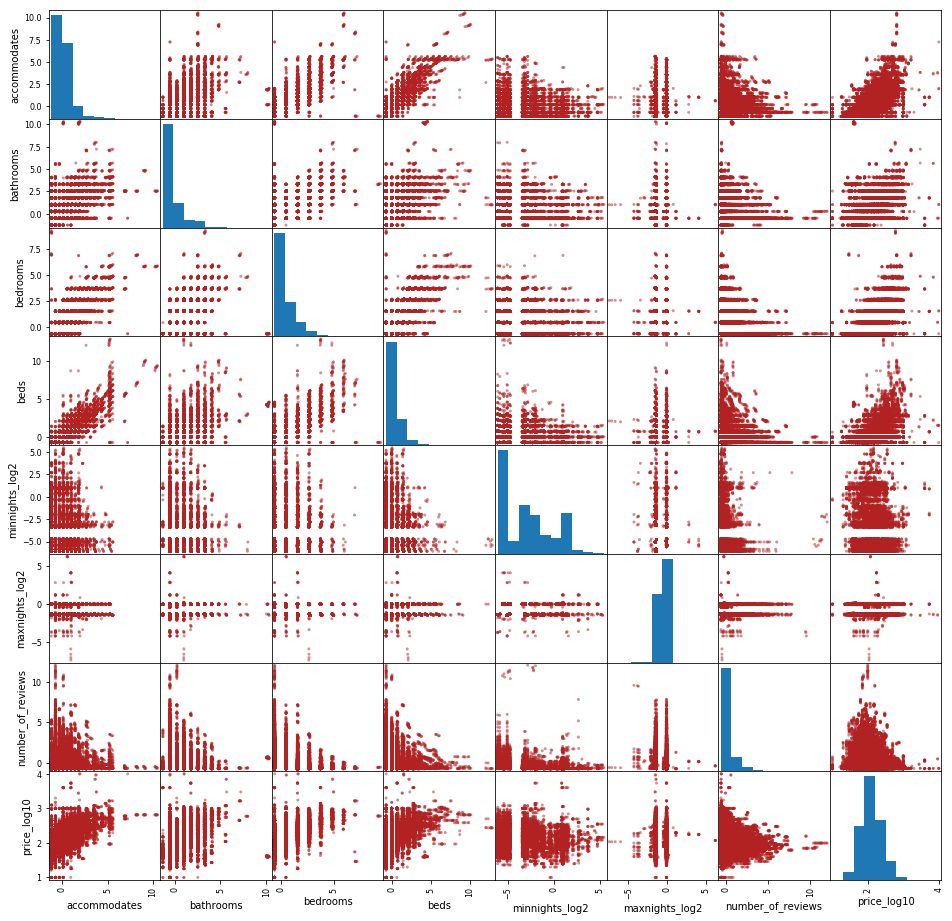

In [42]:
matrix_cols = ['accommodates', 'bathrooms', 'bedrooms',
       'beds','minnights_log2','maxnights_log2','number_of_reviews','price_log10']
axs = pd.plotting.scatter_matrix(listdf[matrix_cols],figsize=(16,16),c='firebrick')

In [45]:
tt = pd.read_csv('../data/2018_04_14/listings.csv')

In [51]:
tt.shape

(7912, 96)

In [3]:
fl = '../save/2018_04_14.csv'
df = pd.read_csv(fl)

In [3]:
df.columns.values

Index(['id', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews', 'Adams',
       ...
       'ChristmasHolidays', 'NewYear', 'MartinLK', 'President', 'Memorial',
       'Independence', 'Labor', 'Columbus', 'Veterans', 'Thanksgiving'],
      dtype='object', length=208)

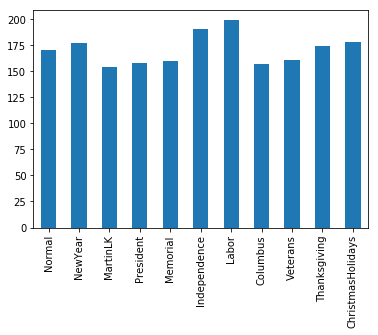

In [60]:
holidays = ['NewYear','MartinLK','President','Memorial','Independence','Labor','Columbus','Veterans','Thanksgiving','ChristmasHolidays']
hdf = df.groupby(list(reversed(holidays)))['price'].mean().to_frame().reset_index(drop=True)#.plot(kind='bar')
holidays.insert(0,'Normal')
hdf.index = holidays
#hdf = hdf.apply(lambda x: x-float(hdf.iloc[0].values))
hdf.plot(kind='bar',legend=False) #title='Relative Price of Different Holidays'
#

In [61]:
hdf = hdf.drop('Normal')

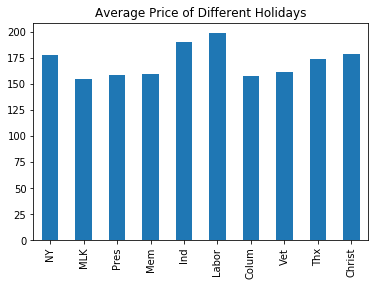

In [62]:
hdf.index= ['NY','MLK','Pres','Mem','Ind','Labor','Colum','Vet','Thx','Christ']
hdf.plot(kind='bar',title='Average Price of Different Holidays',legend=False) #title='Relative Price of Different Holidays'

In [63]:
hdf

,price
NY,177.380466
MLK,154.187533
Pres,158.288818
Mem,159.554393
Ind,190.165631
Labor,198.652600
Colum,157.290414
Vet,160.811862
Thx,173.753080
Christ,178.319867


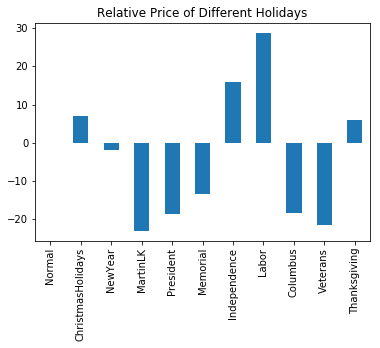

In [25]:
fdf = pd.read_csv('../save/2018_05_17.csv')
holidays = ['ChristmasHolidays','NewYear','MartinLK','President','Memorial','Independence','Labor','Columbus','Veterans','Thanksgiving']
fhdf = fdf.groupby(list(reversed(holidays)))['price'].mean().to_frame().reset_index(drop=True)#.plot(kind='bar')
holidays.insert(0,'Normal')
fhdf.index = holidays
fhdf = fhdf.apply(lambda x: x-float(fhdf.iloc[0].values))
fhdf.plot(kind='bar',title='Relative Price of Different Holidays',legend=False)

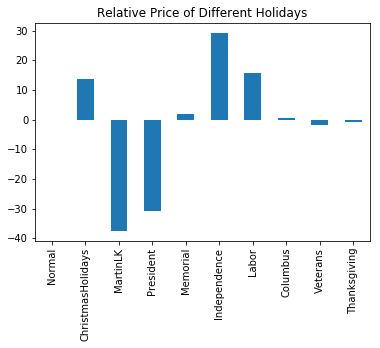

In [38]:
#jdf = pd.read_csv('../save/2019_01_17.csv')
holidays = ['ChristmasHolidays','MartinLK','President','Memorial','Independence','Labor','Columbus','Veterans','Thanksgiving']
jhdf = jdf.groupby(list(reversed(holidays)))['price'].mean().to_frame()#.reset_index(drop=True)#.plot(kind='bar')
holidays.insert(0,'Normal')
jhdf.index = holidays
jhdf = jhdf.apply(lambda x: x-float(jhdf.iloc[0].values))
jhdf.plot(kind='bar',title='Relative Price of Different Holidays',legend=False)

In [106]:
df.columns.values

array(['id', 'host_since', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'Adams', 'Alki', 'Arbor Heights', 'Atlantic', 'Belltown',
       'Bitter Lake', 'Briarcliff', 'Brighton', 'Broadview', 'Broadway',
       'Bryant', 'Cedar Park', 'Central Business District',
       'Columbia City', 'Crown Hill', 'Dunlap', 'East Queen Anne',
       'Eastlake', 'Fairmount Park', 'Fauntleroy', 'First Hill',
       'Fremont', 'Gatewood', 'Genesee', 'Georgetown', 'Green Lake',
       'Greenwood', 'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', 'Leschi',
       'Lower Queen Anne', 'Loyal Heights', 'Madison Park', 'Madrona',
       'Mann', 'Maple Leaf', 'Matthews Beach', 'Meadowbrook',
       'Mid-Beacon Hill', 'Minor', 'Montlake', 'Mount Baker',
       'North Admiral', 'North Beach/Blue Ridg

In [ ]:
axs = pd.scatter_matrix(df[matrix_cols],figsize=(20,20),c='red')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


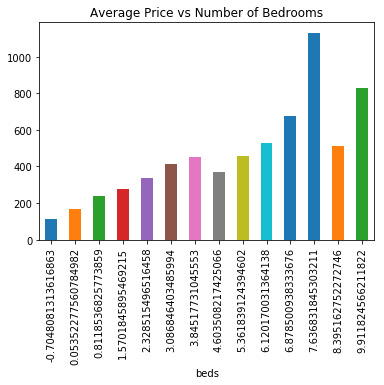

In [112]:
df.groupby('beds')['price'].mean().plot(kind='bar',title='Average Price vs Number of Bedrooms')

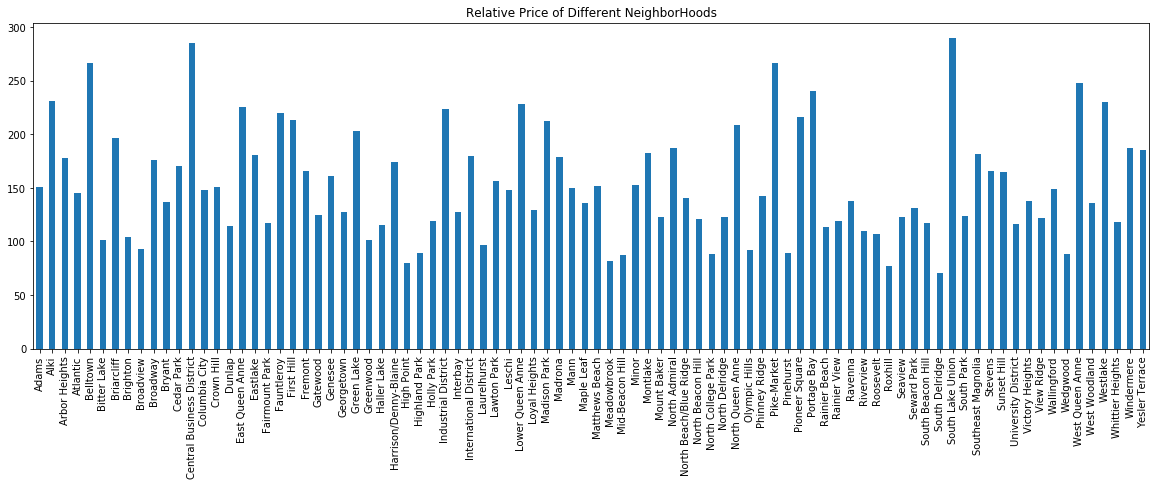

In [64]:
nb = ['Adams', 'Alki', 'Arbor Heights', 'Atlantic',
       'Belltown', 'Bitter Lake', 'Briarcliff', 'Brighton', 'Broadview',
       'Broadway', 'Bryant', 'Cedar Park', 'Central Business District',
       'Columbia City', 'Crown Hill', 'Dunlap', 'East Queen Anne',
       'Eastlake', 'Fairmount Park', 'Fauntleroy', 'First Hill',
       'Fremont', 'Gatewood', 'Genesee', 'Georgetown', 'Green Lake',
       'Greenwood', 'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', 'Leschi',
       'Lower Queen Anne', 'Loyal Heights', 'Madison Park', 'Madrona',
       'Mann', 'Maple Leaf', 'Matthews Beach', 'Meadowbrook',
       'Mid-Beacon Hill', 'Minor', 'Montlake', 'Mount Baker',
       'North Admiral', 'North Beach/Blue Ridge', 'North Beacon Hill',
       'North College Park', 'North Delridge', 'North Queen Anne',
       'Olympic Hills', 'Phinney Ridge', 'Pike-Market', 'Pinehurst',
       'Pioneer Square', 'Portage Bay', 'Rainier Beach', 'Rainier View',
       'Ravenna', 'Riverview', 'Roosevelt', 'Roxhill', 'Seaview',
       'Seward Park', 'South Beacon Hill', 'South Delridge',
       'South Lake Union', 'South Park', 'Southeast Magnolia', 'Stevens',
       'Sunset Hill', 'University District', 'Victory Heights',
       'View Ridge', 'Wallingford', 'Wedgwood', 'West Queen Anne',
       'West Woodland', 'Westlake', 'Whittier Heights', 'Windermere',
       'Yesler Terrace']
nbdf = df.groupby(list(reversed(nb)))['price'].mean().to_frame().reset_index(drop=True)#.plot(kind='bar')
nbdf.index = nb
nbdf.plot(figsize=(20,6),kind='bar',title='Relative Price of Different NeighborHoods',legend=False)

In [68]:
sorted(nbdf)

['price']

In [73]:
nbdf.sort_values(by='price',ascending=False)

,price
South Lake Union,289.733435
Central Business District,285.259794
Pike-Market,266.772745
Belltown,266.390949
West Queen Anne,247.811339
Portage Bay,240.512247
Alki,231.240430
Westlake,229.642922
Lower Queen Anne,227.829127
East Queen Anne,225.587082


In [74]:
nbgroup = pd.read_csv('/Users/yueliu/Downloads/neighbourhoods.csv')

In [99]:
group = [nbgroup[nbgroup['neighbourhood']==x]['neighbourhood_group'].values for x in nbdf.index]

In [102]:
nbdf['nb_group'] = group

In [104]:
nbdf.sort_values(by='price',ascending=False)

,price,nb_group
South Lake Union,289.733435,[Cascade]
Central Business District,285.259794,[Downtown]
Pike-Market,266.772745,[Downtown]
Belltown,266.390949,[Downtown]
West Queen Anne,247.811339,[Queen Anne]
Portage Bay,240.512247,[Capitol Hill]
Alki,231.240430,[West Seattle]
Westlake,229.642922,[Cascade]
Lower Queen Anne,227.829127,[Queen Anne]
East Queen Anne,225.587082,[Queen Anne]


In [105]:
nbgroup

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights
5,Beacon Hill,Holly Park
6,Beacon Hill,Mid-Beacon Hill
7,Beacon Hill,North Beacon Hill
8,Beacon Hill,South Beacon Hill
9,Capitol Hill,Broadway
